In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
missing_values = df.isnull()

In [5]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

show_id
False    8807
Name: show_id, dtype: int64

type
False    8807
Name: type, dtype: int64

title
False    8807
Name: title, dtype: int64

director
False    6173
True     2634
Name: director, dtype: int64

cast
False    7982
True      825
Name: cast, dtype: int64

country
False    7976
True      831
Name: country, dtype: int64

date_added
False    8797
True       10
Name: date_added, dtype: int64

release_year
False    8807
Name: release_year, dtype: int64

rating
False    8803
True        4
Name: rating, dtype: int64

duration
False    8804
True        3
Name: duration, dtype: int64

listed_in
False    8807
Name: listed_in, dtype: int64

description
False    8807
Name: description, dtype: int64



In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
import numpy as np
import seaborn as sns

In [8]:
df.value_counts('country').idxmax

<bound method Series.idxmax of country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                 

In [9]:
df.value_counts('date_added').idxmax

<bound method Series.idxmax of date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
July 4, 2021           1
July 5, 2018           1
July 6, 2016           1
July 7, 2015           1
July 29, 2018          1
Length: 1767, dtype: int64>

In [10]:
df.value_counts('rating').idxmax

<bound method Series.idxmax of rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
dtype: int64>

In [11]:
df.value_counts('duration').idxmax

<bound method Series.idxmax of duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
201 min         1
200 min         1
196 min         1
43 min          1
10 min          1
Length: 220, dtype: int64>

In [12]:
df.drop(['director', 'cast'], axis = 1, inplace = True)

In [13]:
df['country'].replace(np.nan, 'United States', inplace = True)

In [14]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [15]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

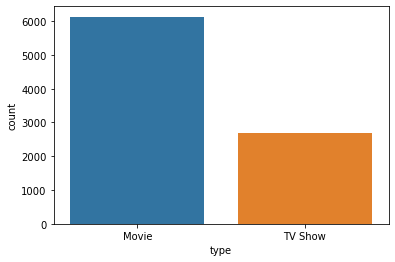

In [17]:
sns.countplot(x='type', data = df)

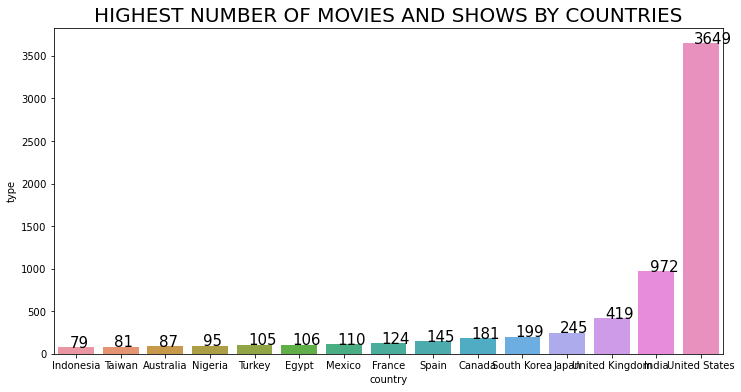

In [66]:
countries = pd.crosstab(df['country'], ['type']).sort_values(by='type', ascending=True)[-15:].reset_index()

plt.figure(figsize=(12,6))
con = sns.barplot(x=countries['country'], y=countries['type'])
plt.title('HIGHEST NUMBER OF MOVIES AND SHOWS BY COUNTRIES', fontsize=20)

for i in con.patches:
    con.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

Text(0.5, 1.0, '10 HIGHEST NUMBER OF MOVIES AND SHOWS BY COUNTRIES')

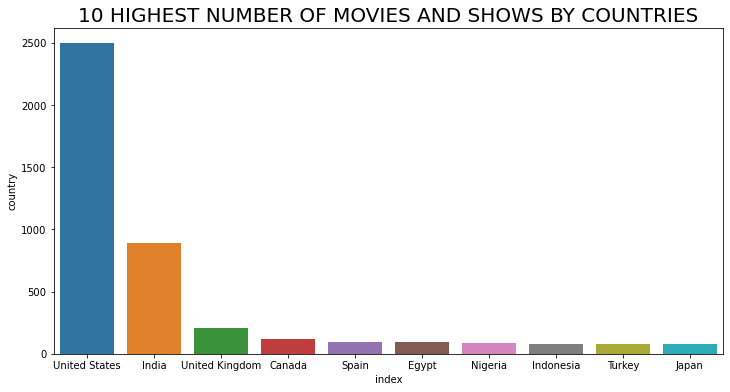

In [37]:
m = df[df['type'] == 'Movie']
movies = m['country'].value_counts().reset_index()[0:10]

plt.figure(figsize=(12,6))
sns.barplot(x=movies['index'], y=movies['country'])
plt.title('10 HIGHEST NUMBER OF MOVIES AND SHOWS BY COUNTRIES', fontsize=20)

Text(0.5, 1.0, '10 HIGHEST NUMBER OF TV SHOWS AND SHOWS BY COUNTRIES')

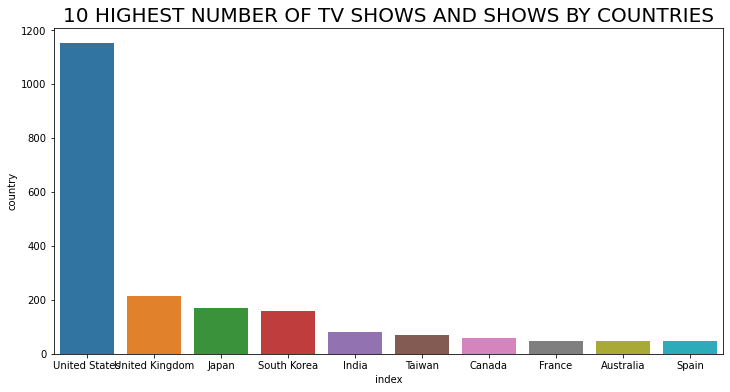

In [39]:
m = df[df['type'] == 'TV Show']
movies = m['country'].value_counts().reset_index()[0:10]

plt.figure(figsize=(12,6))
sns.barplot(x=movies['index'], y=movies['country'])
plt.title('10 HIGHEST NUMBER OF TV SHOWS AND SHOWS BY COUNTRIES', fontsize=20)

In [40]:
df.loc[df['country'] == 'Nigeria']

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
49,s50,TV Show,Castle and Castle,Nigeria,"September 15, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas","A pair of high-powered, successful lawyers fin..."
73,s74,Movie,King of Boys,Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
84,s85,Movie,Omo Ghetto: the Saga,Nigeria,"September 10, 2021",2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
198,s199,TV Show,King of Boys: The Return of the King,Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
281,s282,Movie,Brother Jekwu,Nigeria,"August 11, 2021",2016,TV-14,101 min,"Comedies, International Movies","Chasing wild success, a village hustler follow..."
...,...,...,...,...,...,...,...,...,...,...
7875,s7876,Movie,Road to Yesterday,Nigeria,"July 1, 2016",2015,TV-14,96 min,"Dramas, International Movies","Their marriage failing, Victoria and Izu try t..."
8227,s8228,Movie,The Bridge,Nigeria,"September 1, 2019",2017,TV-14,119 min,"Dramas, International Movies, Romantic Movies",A Yoruba prince and a young lady from a promin...
8241,s8242,Movie,The CEO,Nigeria,"September 1, 2019",2016,TV-14,109 min,"Dramas, International Movies, Thrillers",A group of executives heads to a telecommunica...
8297,s8298,Movie,The Figurine (Araromire),Nigeria,"October 1, 2019",2009,TV-14,121 min,"Horror Movies, International Movies, Thrillers",When a pair of friends discovers a mystical sc...


Text(0.5, 1.0, 'NUMBER OF MOVIES AND SHOWS IN NIGERIA')

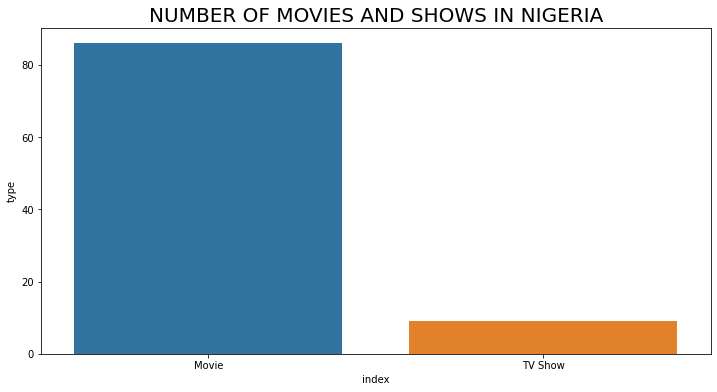

In [44]:
m = df[df['country'] == 'Nigeria']
movies = m['type'].value_counts().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=movies['index'], y=movies['type'])
plt.title('NUMBER OF MOVIES AND SHOWS IN NIGERIA', fontsize=20)

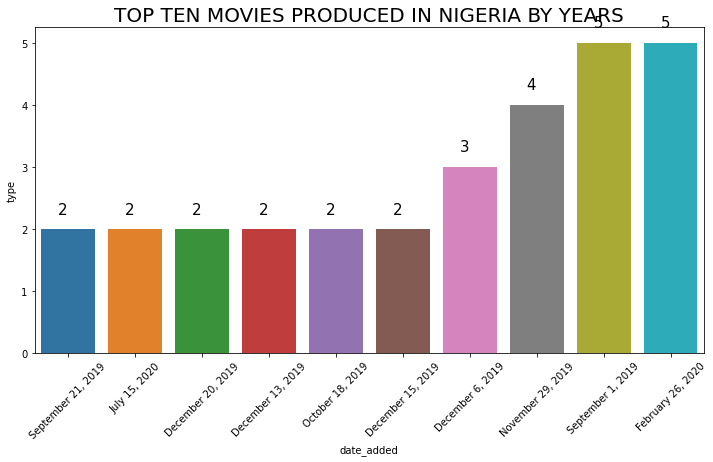

In [71]:
m = df[df['country'] == 'Nigeria']
countries = pd.crosstab(m['date_added'], ['type']).sort_values(by='type', ascending=True)[-10:].reset_index()

plt.figure(figsize=(12,6))
nig = sns.barplot(x=countries['date_added'], y=countries['type'])
plt.title('TOP TEN MOVIES PRODUCED IN NIGERIA BY YEARS', fontsize=20)
plt.xticks(rotation=45)

for i in nig.patches:
    nig.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

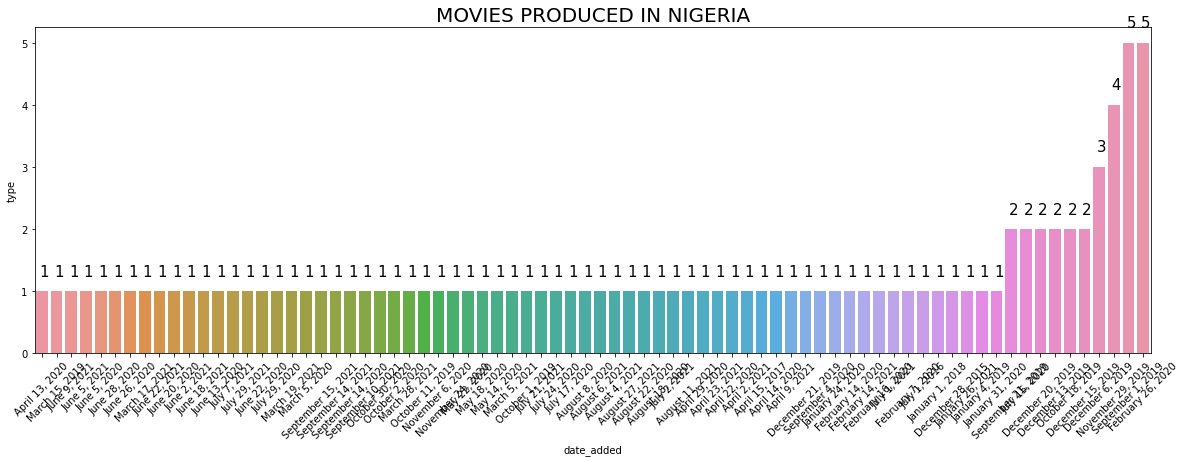

In [72]:
m = df[df['country'] == 'Nigeria']
countries = pd.crosstab(m['date_added'], ['type']).sort_values(by='type', ascending=True).reset_index()

plt.figure(figsize=(20,6))
nig = sns.barplot(x=countries['date_added'], y=countries['type'])
plt.title('MOVIES PRODUCED IN NIGERIA', fontsize=20)
plt.xticks(rotation=45)

for i in nig.patches:
    nig.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

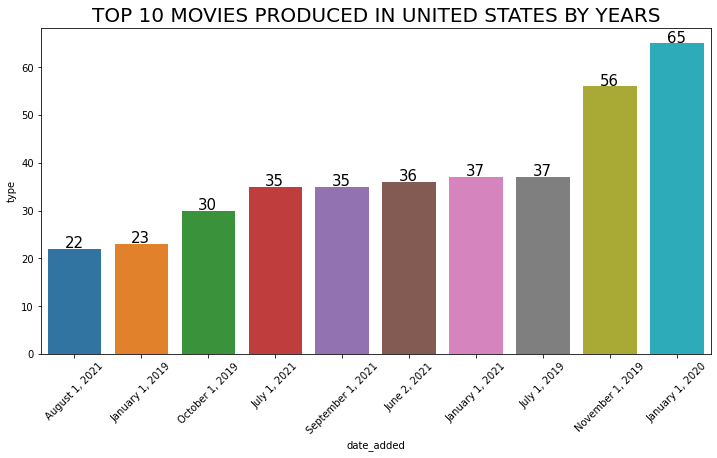

In [73]:
m = df[df['country'] == 'United States']
countries = pd.crosstab(m['date_added'], ['type']).sort_values(by='type', ascending=True)[-10:].reset_index()

plt.figure(figsize=(12,6))
nig = sns.barplot(x=countries['date_added'], y=countries['type'])
plt.title('TOP 10 MOVIES PRODUCED IN UNITED STATES BY YEARS', fontsize=20)
plt.xticks(rotation=45)

for i in nig.patches:
    nig.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

C:\Users\princ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


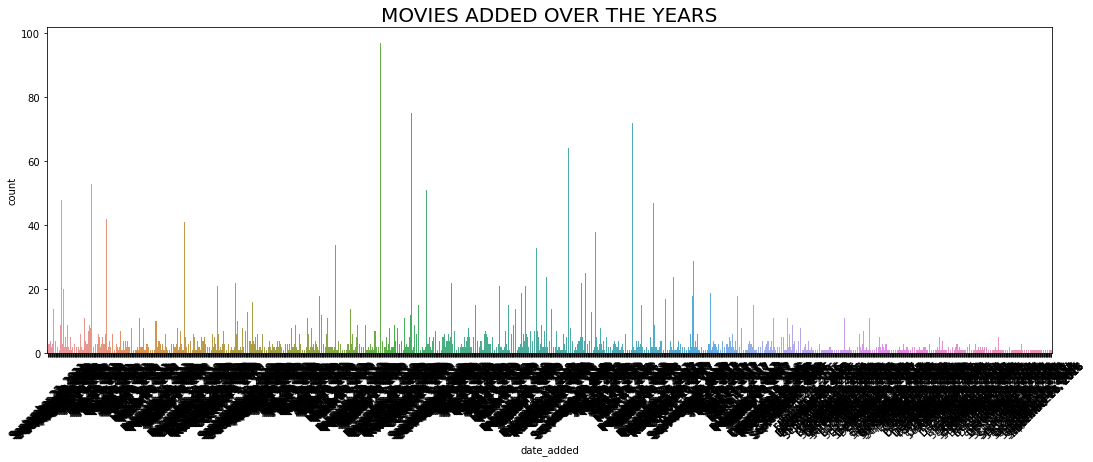

In [77]:
c = df[df['type'] == 'Movie']

plt.figure(figsize=(18,6))
sns.countplot(c['date_added'])
plt.title('MOVIES ADDED OVER THE YEARS', fontsize=20)
plt.xticks(rotation=45)

for i in nig.patches:
    nig.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

<AxesSubplot:xlabel='rating', ylabel='count'>

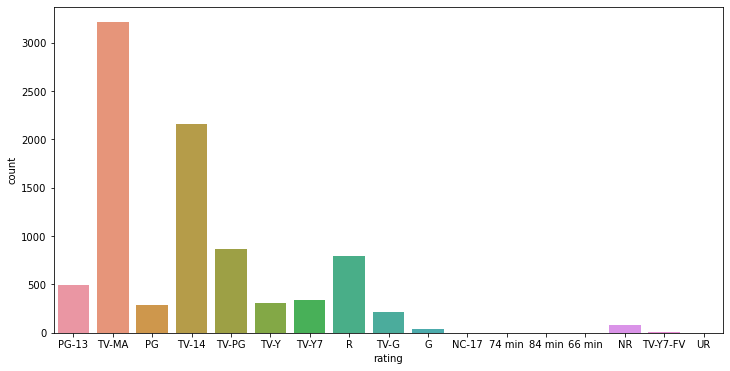

In [78]:
plt.figure(figsize = (12,6))
sns.countplot(x='rating', data = df)

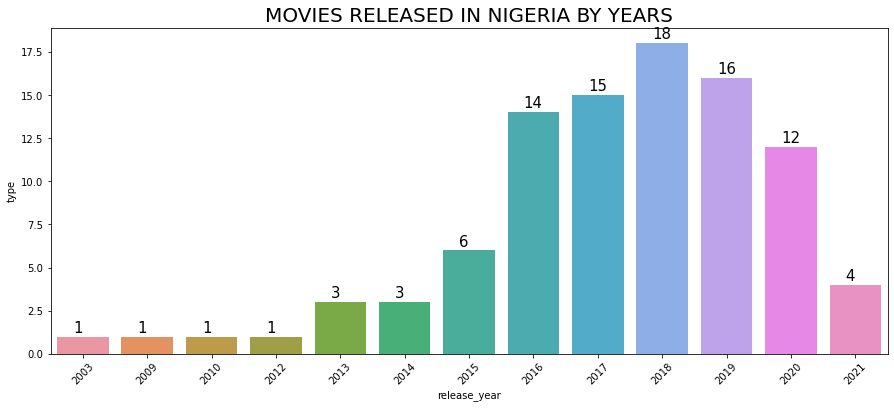

In [84]:
m = df[df['country'] == 'Nigeria']
countries = pd.crosstab(m['release_year'], ['type']).sort_values(by='release_year', ascending=True).reset_index()

plt.figure(figsize=(15,6))
nig = sns.barplot(x=countries['release_year'], y=countries['type'])
plt.title('MOVIES RELEASED IN NIGERIA BY YEARS', fontsize=20)
plt.xticks(rotation=45)

for i in nig.patches:
    nig.text(i.get_x()+.25, i.get_height()+.25, str(int((i.get_height()))), rotation=0, fontsize=15, color='black')

<AxesSubplot:xlabel='rating', ylabel='count'>

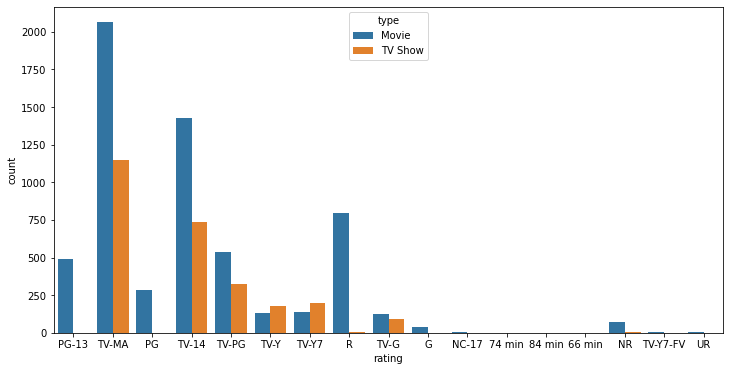

In [85]:
plt.figure(figsize = (12,6))
sns.countplot(x='rating', data = df, hue = 'type')

In [87]:
old = df.sort_values('release_year', ascending = True)
old = old[old['duration'] !='']
old[['title', 'release_year']][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


In [88]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [91]:
df.loc[df['listed_in'] == 'Stand-Up Comedy'].sort_values(by= 'release_year', ascending = True)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5704,s5705,Movie,Richard Pryor: Live in Concert,United States,"December 1, 2016",1979,TV-MA,79 min,Stand-Up Comedy,Richard Pryor's classic 1979 concert film has ...
6665,s6666,Movie,Eddie Murphy: Delirious,United States,"April 15, 2018",1983,TV-MA,69 min,Stand-Up Comedy,Flashing the wild stand-up comedy that made hi...
1450,s1451,Movie,Eddie Murphy: Raw,United States,"January 1, 2021",1987,R,90 min,Stand-Up Comedy,This stand-up comedy classic features Eddie Mu...
4237,s4238,Movie,Sam Kinison: Breaking the Rules,United States,"December 31, 2018",1987,TV-MA,50 min,Stand-Up Comedy,The one-time preacher shakes and shudders as h...
4233,s4234,Movie,Bill Hicks: Sane Man,United States,"December 31, 2018",1989,TV-MA,81 min,Stand-Up Comedy,Filmed in 1989 at a turning point in comedian ...
...,...,...,...,...,...,...,...,...,...,...
1249,s1250,Movie,Blanche Gardin: The All-Nighter,United States,"March 1, 2021",2021,TV-MA,96 min,Stand-Up Comedy,"With self-deprecating humor, French comic Blan..."
1278,s1279,Movie,Brian Regan: On the Rocks,United States,"February 23, 2021",2021,TV-G,58 min,Stand-Up Comedy,Brian Regan tackles the big issues weighing on...
1315,s1316,Movie,Hate by Dani Rovira,Spain,"February 12, 2021",2021,TV-MA,83 min,Stand-Up Comedy,"From his hometown of Málaga, Dani Rovira refle..."
1172,s1173,Movie,Loyiso Gola: Unlearning,South Africa,"March 23, 2021",2021,TV-MA,60 min,Stand-Up Comedy,South African comedian Loyiso Gola serves up f...


In [92]:
df.loc[df['listed_in'] == "Kids' TV"].sort_values(by= 'release_year', ascending = True)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
8523,s8524,TV Show,The Super Mario Bros. Super Show!,"United States, Canada","May 22, 2016",1989,TV-Y7,1 Season,Kids' TV,"Mixing live action and animation, this classic..."
813,s814,TV Show,The Adventures of Sonic the Hedgehog,"United States, Canada","June 2, 2021",1993,TV-Y7,1 Season,Kids' TV,"Hyper hedgehog Sonic and his cohort Miles ""Tai..."
8669,s8670,TV Show,V.R. Troopers,United States,"January 1, 2016",1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...
7455,s7456,TV Show,Mighty Morphin Alien Rangers,United States,"January 1, 2016",1996,TV-Y7,1 Season,Kids' TV,Visitors arrive from space to help Red Ranger ...
7785,s7786,TV Show,Power Rangers Zeo,"United States, France, Japan","January 1, 2016",1996,TV-Y7,1 Season,Kids' TV,"This ""Mighty Morphin Power Rangers"" spinoff fi..."
...,...,...,...,...,...,...,...,...,...,...
1245,s1246,TV Show,Word Party,United States,"March 2, 2021",2021,TV-Y,5 Seasons,Kids' TV,"Meet Bailey, Franny, Kip and Lulu. They're ado..."
1380,s1381,TV Show,Go Dog Go,"United States, United Kingdom","January 26, 2021",2021,TV-Y,1 Season,Kids' TV,Handy and inventive pup Tag chases adventure w...
1395,s1396,TV Show,Hello Ninja,United States,"January 19, 2021",2021,TV-Y,4 Seasons,Kids' TV,BFFs Wesley and Georgie and their silly cat si...
547,s548,TV Show,We the People,United States,"July 4, 2021",2021,TV-Y7,1 Season,Kids' TV,Learn the basics of rights and citizenship wit...


In [99]:
df['country'].value_counts().to_frame()

,country
United States,3649
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1
"Mexico, United States, Spain, Colombia",1


In [103]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns = ['country', 'count'])
df_countries.head()

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [107]:
import plotly.express as px
#!pip install plotly

In [112]:
fig = px.choropleth(locationmode = 'country names', locations = df_countries.country, labels = df_countries['count'])
fig.show()

Text(0.5, 1.0, 'Top 10 Genres of Movies')

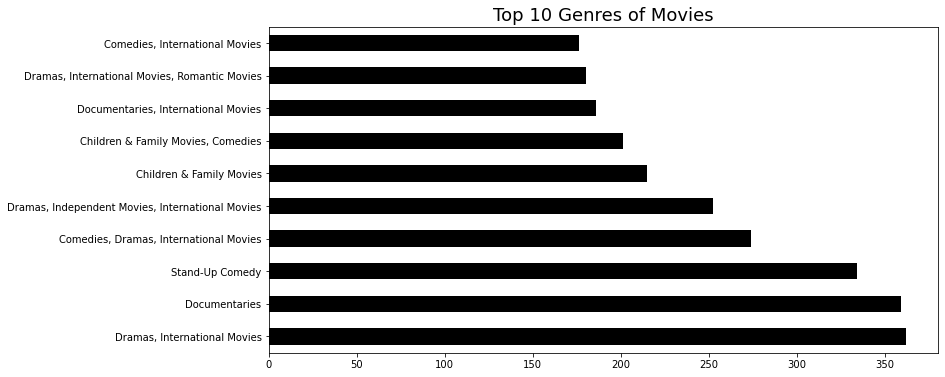

In [114]:
plt.figure(figsize = (12,6))
df[df['type']=='Movie']['listed_in'].value_counts()[:10].plot(kind='barh', color='black')
plt.title('Top 10 Genres of Movies', fontsize=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

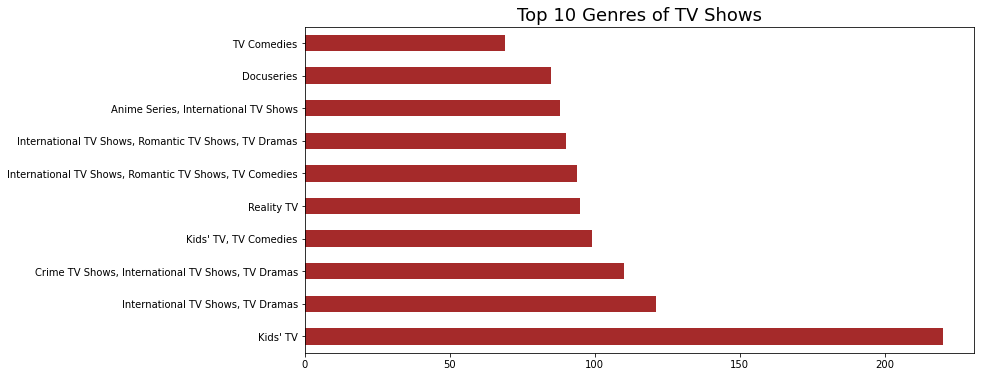

In [116]:
plt.figure(figsize = (12,6))
df[df['type']=='TV Show']['listed_in'].value_counts()[:10].plot(kind='barh', color='brown')
plt.title('Top 10 Genres of TV Shows', fontsize=18)